# Introduction

In this notebook, we randomly generate an ensemble of potentials to be used in solving Schrodinger's equaiton.

Each potential is generated as an expansion in Legendre polynomials:
$$ V(x) = \sum\limits_{n=0}^{n_{\rm max}} V_n P_n(x) $$
where the coefficients $\{V_n \,\,|\,\, n \in [0,n_{\rm max}]\}$ are random numbers drawn from a specified probability distribution.

We model the probability distributions for each $V_n$ as a gaussian with zero mean and variance 
$$ \langle V_n^2 \rangle = V_0^2 e^{-\lambda n} $$
In this way we bias sampled functions toward those with fewer modes. The parameter $\lambda$ controlls the number of modes that contribute to the function space. We note that to represent the function space with the variance specified by $\lambda$, we must have $n_{\rm max} \gg 1/\lambda$.

Created by Hudson Smith on 2016-06-28.
Copyright (c) 2016 ACT. All rights reserved.

# Preliminaries

In [293]:
%matplotlib inline
import numpy as np
from numpy.random import normal, randint
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import legval

# Number of potentials:
NV = int(1E5)
# Number of basis states:
NB = 20
ns = np.arange(0, NB+1)
# lambda (variance of Legendre coefficients):
lamC = 8
lam = lamC/NB
# The variance of the n=0 legendre coefficient V_0:
V20 = 1

# Output file:
filepath = "./Data/Potentials/NV" + str(NV) + "_NB" + str(NB) + "_lamNB" + str(lamC)

# Mode variances

In [294]:
def modeVariance(n, lam, V20):
    return V20 * np.exp(-lam*n)

print(modeVariance(0, 0.1, 1))
print(modeVariance(np.arange(0,10),0.1,1))

1.0
[ 1.          0.90483742  0.81873075  0.74081822  0.67032005  0.60653066
  0.54881164  0.4965853   0.44932896  0.40656966]


In [295]:
V2ns = modeVariance(ns, lam, V20)

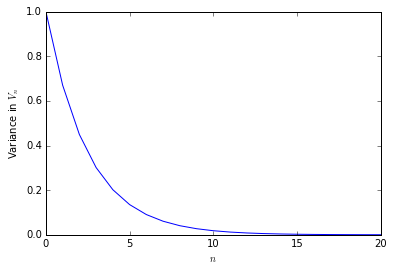

In [296]:
plt.clf()
plt.plot(ns, V2ns)
plt.xlabel("$n$")
plt.ylabel("Variance in $V_n$")
plt.show()

# Generate random numbers
We generate a matrix of numbers. The rows correspond to different random potentials, and the columns correspond to the the coefficients $V_n$ of the expansion in Legendre polynomials. After generating the potential coefficients, we plot a histogram of the distribution for a few different values of $V_n$.

In [297]:
stddevs = np.sqrt(V2ns)
Vns = normal(0,stddevs, size = (NV, NB+1))

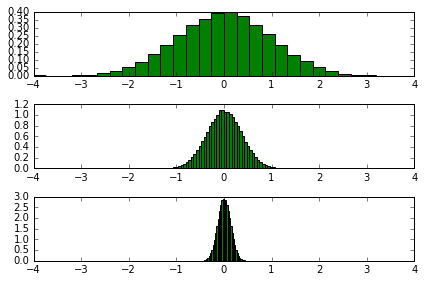

In [298]:
fig, axes = plt.subplots(nrows = 3, ncols = 1)
ax0,ax1,ax2 = axes.flat

nbins = 30
ax0.hist(Vns[::,0], nbins, normed = 1, facecolor = 'green', alpha = 1, range = [-4,4])
ax1.hist(Vns[::,5], 5*nbins, normed = 1, facecolor = 'green', alpha = 1, range = [-4,4])
ax2.hist(Vns[::,10], 10*nbins, normed = 1, facecolor = 'green', alpha = 1, range = [-4,4])

plt.tight_layout()
plt.show()

# Centering the potentials
There is currently no constraint on the average values of the potential. Since the average value of the potential only has the effect of shifting the eigenspectrum, the average value is uninteresting. We can better compare the potentials subtract the mean. The mean is

$$
\bar V = \frac{1}{2}\int\limits_{-1}^{1}dx V(x) 
= \frac{1}{2}\sum\limits_{n=0}^{n_{\rm max}} V_n\int\limits_{-1}^{1}dx\, P_n = \frac{V_0}{2}
$$

So, we simply require $V_0 = 0$. 

In [299]:
Vns[::,0]=0

# Plotting the potentials

In [300]:
Nx = 100
xs = np.linspace(-1,1,100)
Vgrid = legval(xs, np.transpose(Vns))
np.shape(Vgrid)

(100000, 100)

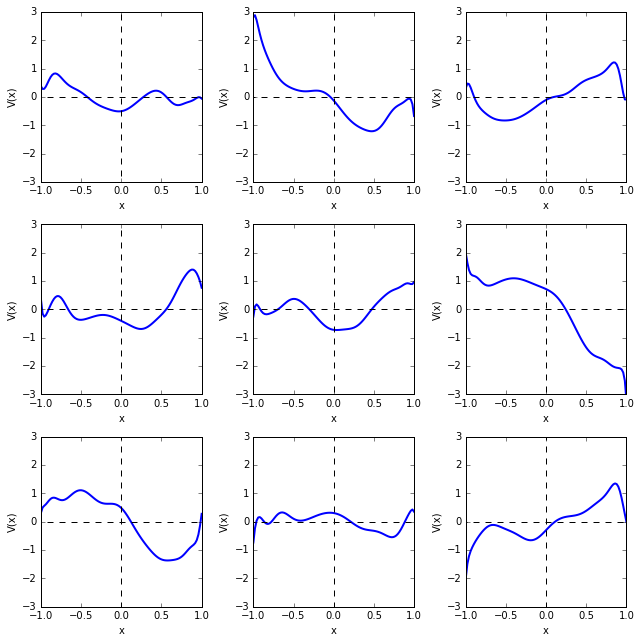

In [301]:
nrows = 3
ncols = 3
nplot = nrows * ncols
Vints = randint(0,NV, nplot)
Vplot = Vgrid[Vints,::]

plt.clf()
fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
fig.set_size_inches(3*ncols,3*nrows)
subax = axes.flat

for i in range(0,nplot):
        subax[i].plot(xs, Vplot[i], linewidth = 2)
        subax[i].axhline(y=0,xmin=-1,xmax=1, linestyle='dashed' ,color = 'k')
        subax[i].axvline(x=0,ymin=-10,ymax=10, linestyle='dashed' ,color = 'k')
        subax[i].set_xlabel("x")
        subax[i].set_ylabel("V(x)")
        subax[i].set_ylim((-3,3))

plt.tight_layout()
plt.show()

# Data export

In [302]:
np.save(filepath, Vns)